In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
np.set_printoptions(precision=2)

In [82]:
df = pd.read_csv("p_reg.csv")
v = df.values
x = v[:,0] #feature
#x = np.array(x, dtype=np.float64)
y_train = v[:,1] #target

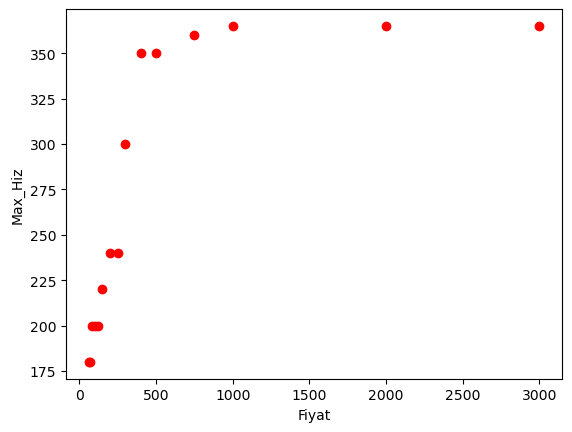

In [83]:
plt.scatter(x, y_train, c="r")
plt.ylabel("Max_Hiz")
plt.xlabel("Fiyat")
plt.show()

In [84]:
X = np.c_[x, x**(1/2)]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
sgdr = SGDRegressor(max_iter=1000000000)
sgdr.fit(X, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 12709, number of weight updates: 190636.0


In [99]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-160.64  217.92], b:[274.34]


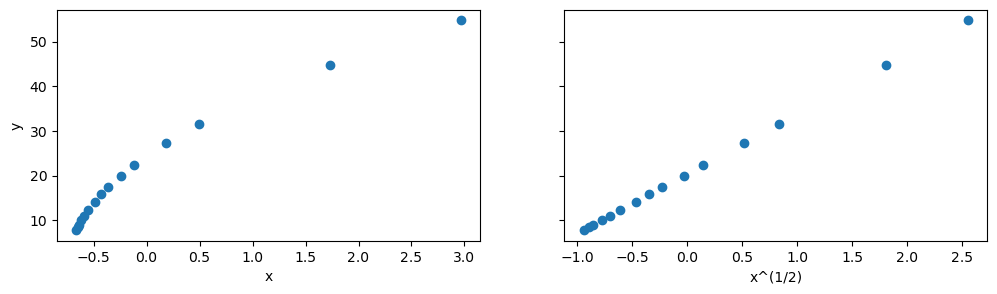

In [100]:
X_features = ["x","x^(1/2)"]
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

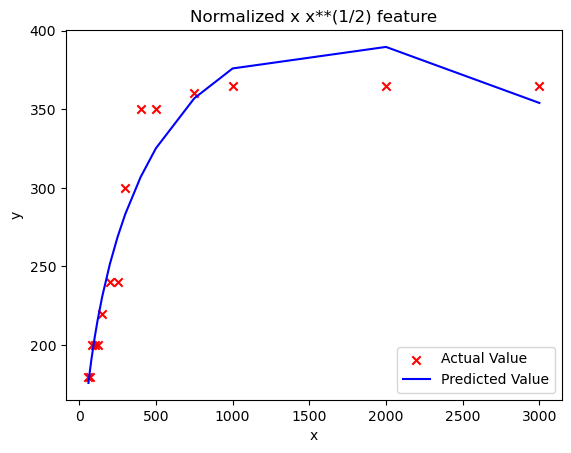

In [101]:
y = x**(1/2)
y_pred_sgd = sgdr.predict(X)
plt.scatter(x, y_train, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**(1/2) feature")
plt.plot(x, y_pred_sgd, c="b", label="Predicted Value")
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend()
plt.show()

## 